In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("covidprediction.csv")

C:\Users\Chintha pavan kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [4]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [5]:
df=data.drop(["test_date","age_60_and_above","test_indication"],axis='columns')

In [6]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender
0,0,0,0,0,0,negative,female
1,1,0,0,0,0,negative,female
2,0,1,0,0,0,negative,male
3,1,0,0,0,0,negative,female
4,1,0,0,0,0,negative,male
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,negative,None
278844,0,0,0,0,0,negative,None
278845,0,0,0,0,0,positive,None
278846,0,0,0,0,0,other,None


In [7]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender
count,278848,278848,278848,278848,278848,278848,278848
unique,5,5,5,5,5,3,3
top,0,0,0,0,0,negative,female
freq,121649,133942,260664,261079,260079,260227,130158


In [8]:
df.shape

(278848, 7)

In [9]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
dtype: int64

In [10]:
df.groupby('corona_result')['corona_result'].agg('count')

corona_result
negative    260227
other         3892
positive     14729
Name: corona_result, dtype: int64

In [11]:
df['corona_result'].replace(["negative","positive","other"],[0,1,2],inplace=True)
df.groupby('corona_result')['corona_result'].agg('count')

corona_result
0    260227
1     14729
2      3892
Name: corona_result, dtype: int64

In [12]:
df.groupby('gender')['gender'].agg('count')

gender
None       19563
female    130158
male      129127
Name: gender, dtype: int64

In [13]:
df['gender'].replace(["female","male","None"],[0,1,2],inplace=True)
df.groupby('gender')['gender'].agg('count')

gender
0    130158
1    129127
2     19563
Name: gender, dtype: int64

In [14]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,2
278844,0,0,0,0,0,0,2
278845,0,0,0,0,0,1,2
278846,0,0,0,0,0,2,2


In [15]:
df["cough"].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [16]:
df["cough"].replace(["0","1","None"],[0,1,0],inplace=True)

In [17]:
df["cough"].unique()

array([0, 1], dtype=int64)

In [18]:
df["fever"].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [19]:
df["fever"].replace(["0","1","None"],[0,1,0],inplace=True)

In [20]:
df["fever"].unique()

array([0, 1], dtype=int64)

In [21]:
df["sore_throat"].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [22]:
df["sore_throat"].replace(["0","1","None"],[0,1,0],inplace=True)

In [23]:
df["sore_throat"].unique()

array([0, 1], dtype=int64)

In [24]:
df["shortness_of_breath"].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [25]:
df["shortness_of_breath"].replace(["0","1","None"],[0,1,0],inplace=True)

In [26]:
df["shortness_of_breath"].unique()

array([0, 1], dtype=int64)

In [27]:
df["head_ache"].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [28]:
df["head_ache"].replace(["0","1","None"],[0,1,0],inplace=True)

In [29]:
df["head_ache"].unique()

array([0, 1], dtype=int64)

In [30]:
df["gender"].unique()

array([0, 1, 2], dtype=int64)

In [31]:
x=df.drop(["corona_result"],axis="columns")

In [32]:
x

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
278843,0,0,0,0,0,2
278844,0,0,0,0,0,2
278845,0,0,0,0,0,2
278846,0,0,0,0,0,2


In [33]:
y=df["corona_result"]

In [34]:
y

0         0
1         0
2         0
3         0
4         0
         ..
278843    0
278844    0
278845    1
278846    2
278847    0
Name: corona_result, Length: 278848, dtype: int64

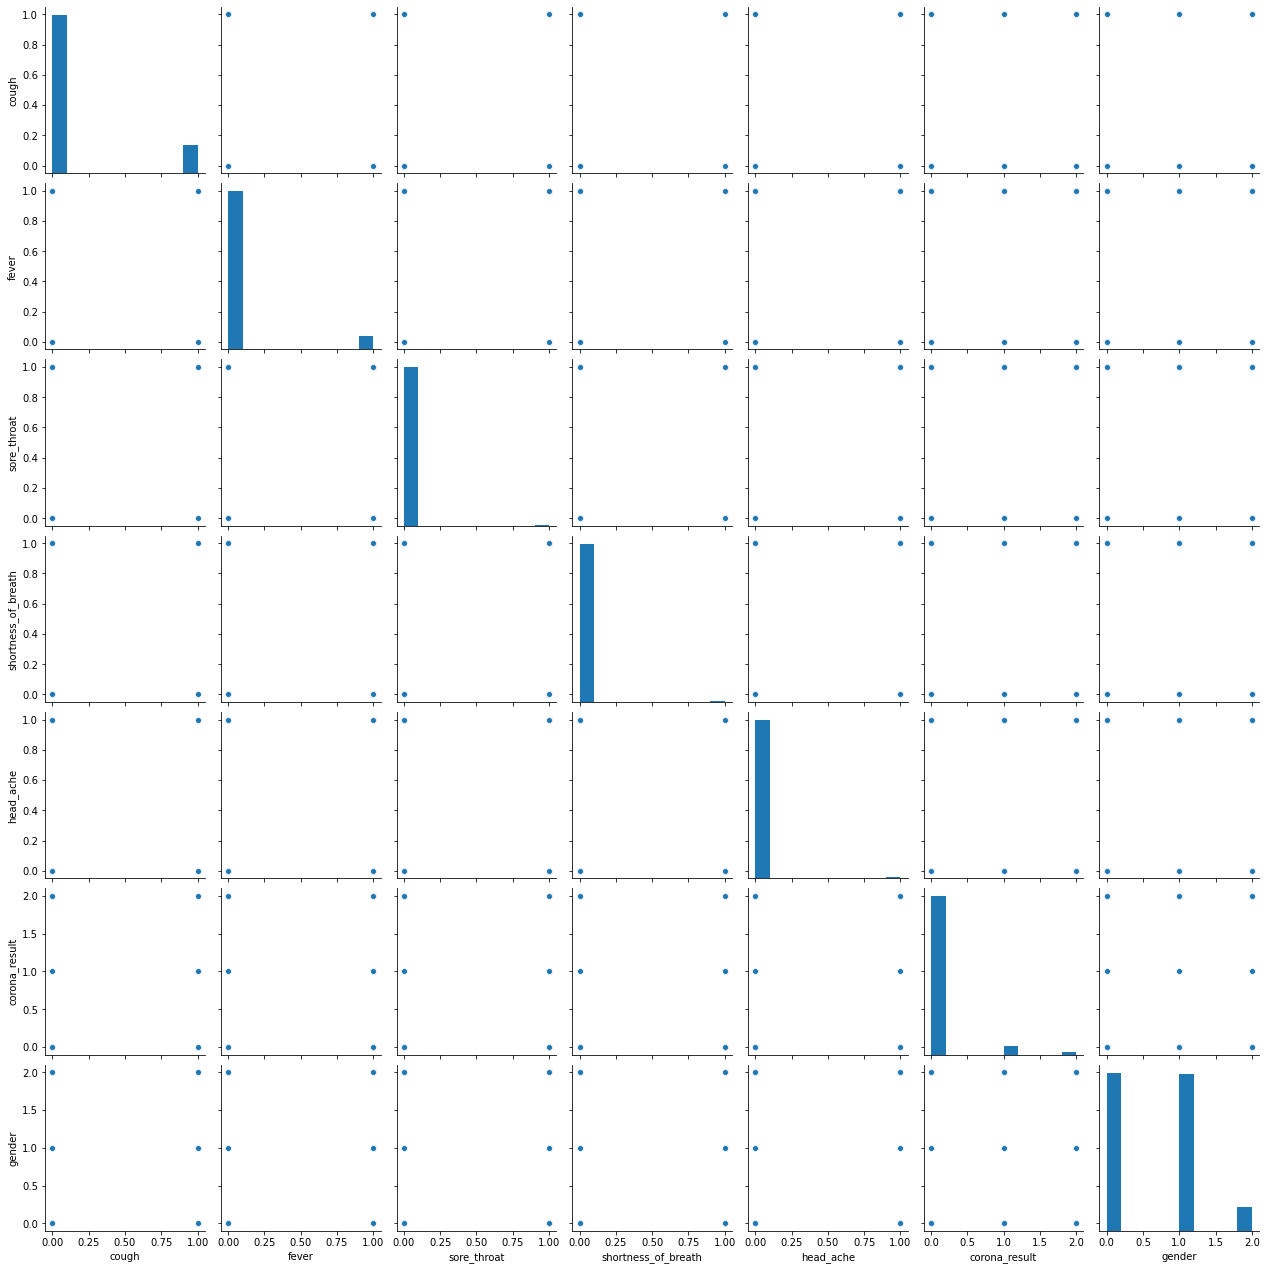

In [35]:
sns.pairplot(df)

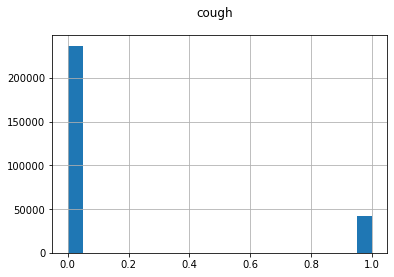

In [36]:
col="cough"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

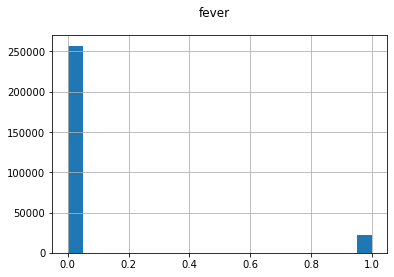

In [37]:
col="fever"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

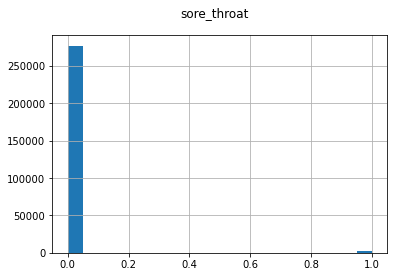

In [38]:
col="sore_throat"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

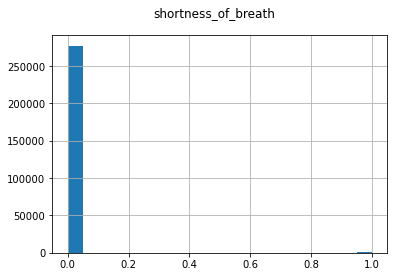

In [39]:
col="shortness_of_breath"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

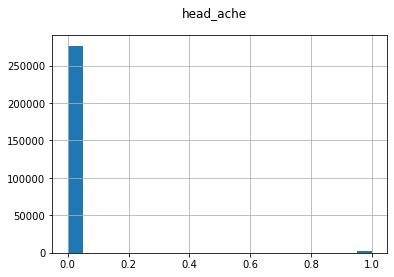

In [40]:
col="head_ache"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

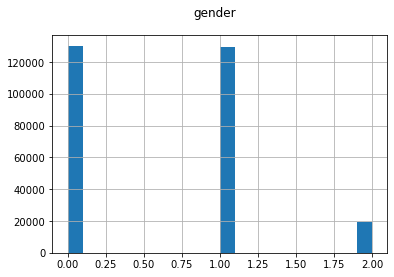

In [41]:
col="gender"
df[col].hist(bins=20)
plt.suptitle(col)
plt.show()

Text(0.5, 0.98, 'cough')

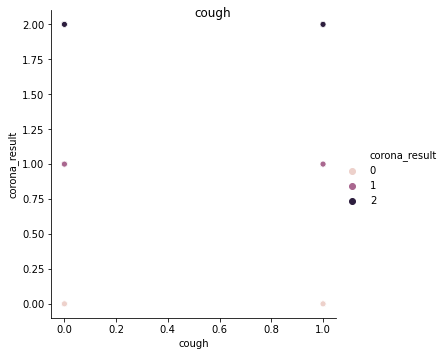

In [42]:
col="cough"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'fever')

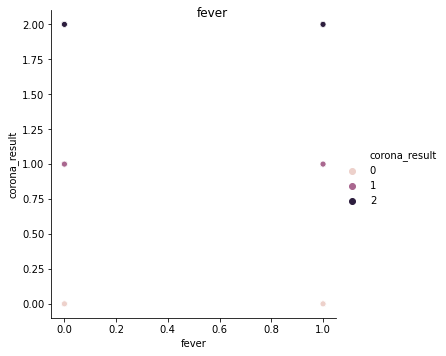

In [43]:
col="fever"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'sore_throat')

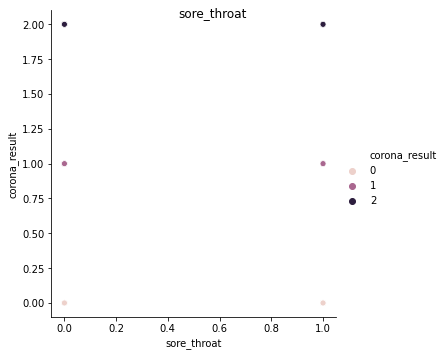

In [44]:
col="sore_throat"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'shortness_of_breath')

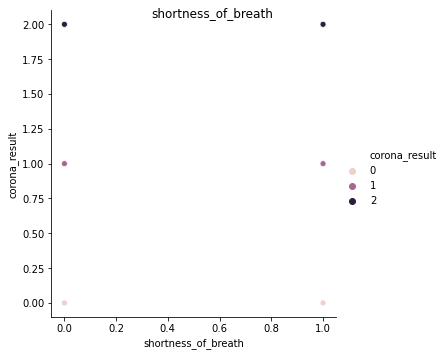

In [45]:
col="shortness_of_breath"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'head_ache')

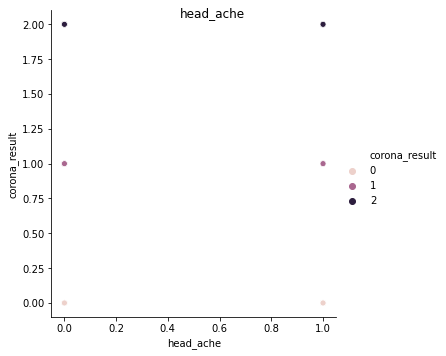

In [46]:
col="head_ache"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'gender')

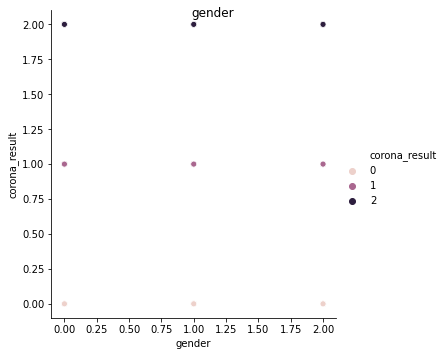

In [47]:
col="gender"
sns.relplot(x=col,y='corona_result',hue="corona_result",data=df)
plt.suptitle(col)

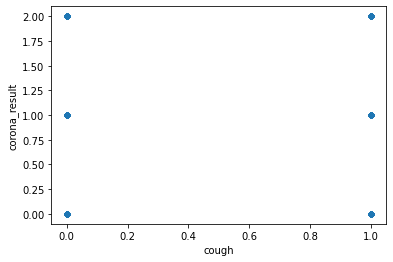

In [48]:
df.plot.scatter(x='cough',y='corona_result')

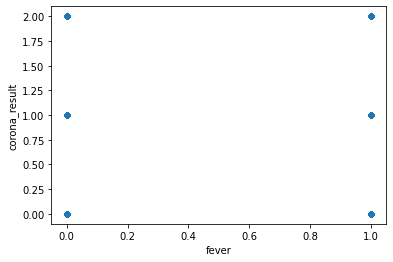

In [49]:
df.plot.scatter(x='fever',y='corona_result')

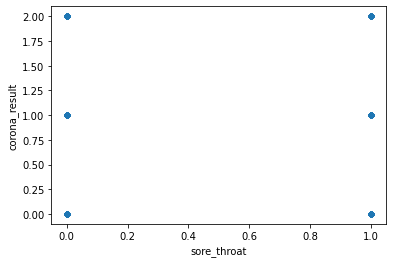

In [50]:
df.plot.scatter(x='sore_throat',y='corona_result')

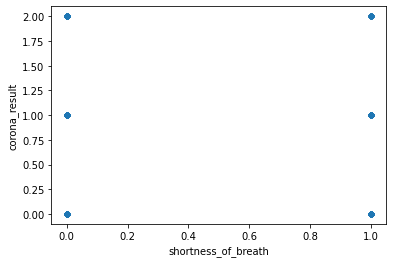

In [51]:
df.plot.scatter(x='shortness_of_breath',y='corona_result')

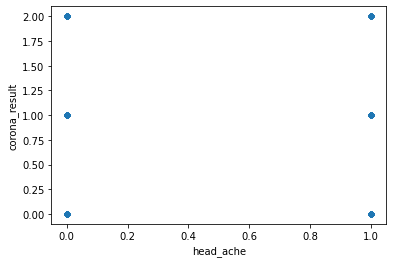

In [52]:
df.plot.scatter(x='head_ache',y='corona_result')

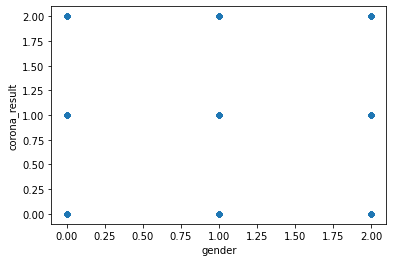

In [53]:
df.plot.scatter(x='gender',y='corona_result')

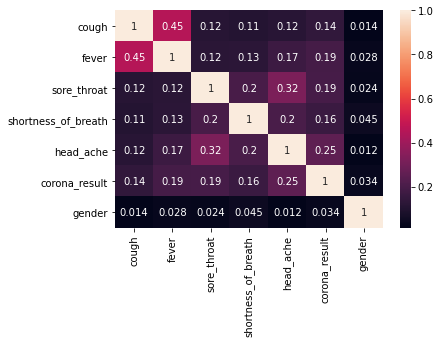

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
xtrain.shape

(195193, 6)

In [57]:
xtest.shape

(83655, 6)

In [58]:
ytrain.shape

(195193,)

In [59]:
ytest.shape

(83655,)

In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
type(x)

pandas.core.frame.DataFrame

In [62]:
inp_train=xtrain.values
inp_train

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

In [63]:
out_train=ytrain.values
out_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
inp_test=xtest.values
inp_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

In [65]:
out_test=ytest.values
out_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
type(inp_train)

numpy.ndarray

In [67]:
type(inp_test)

numpy.ndarray

In [68]:
type(out_train)

numpy.ndarray

In [69]:
type(out_test)

numpy.ndarray

# LOGISTIC REFRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression()

In [74]:
model.fit(inp_train,out_train)

LogisticRegression()

In [75]:
model.score(inp_train,out_train)

0.9434559640970731

In [76]:
y_pred=model.predict(inp_test)

In [78]:
y_pred == out_test

array([ True,  True,  True, ...,  True,  True,  True])

In [79]:
model_accuracy=np.mean(y_pred == out_test)

In [80]:
model_accuracy

0.9434343434343434

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([('rescale', StandardScaler()),('classifier', KNeighborsClassifier())])
pipe.fit(inp_train,out_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [82]:
y_prediction=pipe.predict(inp_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(out_test,y_prediction)

0.9449285756978064

# SVM

In [84]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=1)
classifier.fit(inp_train,out_train)

SVC(random_state=1)

In [85]:
y_pre = classifier.predict(inp_test)

In [86]:
SVM_accuracy=np.mean(y_pre == out_test)

In [87]:
SVM_accuracy

0.9449405295559141

In [88]:
new_input=[[0,1,0,0,0,0]]

In [89]:
classifier.predict(new_input)

array([0], dtype=int64)

In [90]:
new_input1=[[1,1,1,1,1,1]]

In [91]:
classifier.predict(new_input1)

array([1], dtype=int64)

# DECISION TREE

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(inp_train,out_train)

DecisionTreeRegressor(random_state=0)

In [93]:
ypdec=dt.predict(inp_test)

In [94]:
Decision_Tree_accuracy=np.mean(y_pre == out_test)

In [95]:
Decision_Tree_accuracy

0.9449405295559141

# LINEAR REGRESSION

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model1=LinearRegression()

In [100]:
model1.fit(inp_train,out_train)

LinearRegression()

In [101]:
model1.score(inp_train,out_train)

0.10882962812059371